
# Assignment on K nearest neighbours

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset
datasetInput = {}
datasetLabel = {}

for i in range(1, 11):
  DataName = 'knn-dataset/trainData' + str(i) + '.csv'
  LabelName = 'knn-dataset/trainLabels' + str(i) + '.csv'
  datasetInput[i] = pd.read_csv(DataName)
  datasetLabel[i] = pd.read_csv(LabelName)

  print(datasetInput[i].shape, datasetLabel[i].shape)
  assert datasetInput[i].shape[0] == datasetLabel[i].shape[0]

datasetLabel[3].head()



(99, 64) (99, 1)
(99, 64) (99, 1)
(99, 64) (99, 1)
(99, 64) (99, 1)
(99, 64) (99, 1)
(99, 64) (99, 1)
(99, 64) (99, 1)
(99, 64) (99, 1)
(99, 64) (99, 1)
(99, 64) (99, 1)


6
0  6
1  6
2  5
3  6
4  5

In [31]:
for i in range(1, 2):
  x = datasetInput[i].iloc[:, :].values
  y = datasetLabel[i].iloc[:, :].values

  # voronoi daigram 
  plt.scatter(x[:, 0], x[:, 1], c=y[:, 0], cmap='rainbow')



In [4]:
def findNearestK( x , y, k, p ):

  """ 
  x: input data
  y: label
  k: number of nearest neighbors
  p: point to be classified
  """
  # checking if the number of input data is the same as the number of labels
  assert x.shape[0] == y.shape[0]

  # checking if the point is in the same dimension as the input data
  assert x.shape[1] == p.shape[0]

  distance = np.zeros((x.shape[0], 2))
  for i in range(x.shape[0]):
    distance[i, 0] = i
    distance[i, 1] = np.linalg.norm(x[i, :] - p, ord=2)
  
  # sort the distances and pick the first k
  distance = distance[distance[:, 1].argsort()][:k, :]
  # print(distance)

  #count the number of 5 and 6
  labelCount = np.zeros((2, 1))

  for i in range(k):
    labelCount[y[int(distance[i, 0]), 0]-5] += 1

  # print( "5 appears ", labelCount[0], " times and 6 appears ", labelCount[1], " times" )
  return np.argmax(labelCount)

In [5]:
testData = 'knn-dataset/testData.csv'
testLabel = 'knn-dataset/testLabels.csv'

testData = pd.read_csv(testData)
testLabel = pd.read_csv(testLabel)

result = np.zeros((30, 2))
individualResults = np.zeros((10, 30, 2))
for ksize in range(1, 31):
  print("k = ", ksize)
  for index in range(1,11):
    x = datasetInput[index].iloc[:, :].values
    y = datasetLabel[index].iloc[:, :].values

    testInput = testData.iloc[:, :].values
    correct = 0
    for testcase in range(testInput.shape[0]):
      if findNearestK(x, y, ksize, testInput[testcase, :]) == testLabel.iloc[testcase, 0] - 5:
        correct += 1
    result[ksize - 1, 0] = ksize
    result[ksize - 1, 1] += correct / x.shape[0]
    individualResults[index - 1, ksize - 1, 0] = ksize
    individualResults[index - 1, ksize - 1, 1] += correct / x.shape[0]


k =  1
k =  2
k =  3
k =  4
k =  5
k =  6
k =  7
k =  8
k =  9
k =  10
k =  11
k =  12
k =  13
k =  14
k =  15
k =  16
k =  17
k =  18
k =  19
k =  20
k =  21
k =  22
k =  23
k =  24
k =  25
k =  26
k =  27
k =  28
k =  29
k =  30


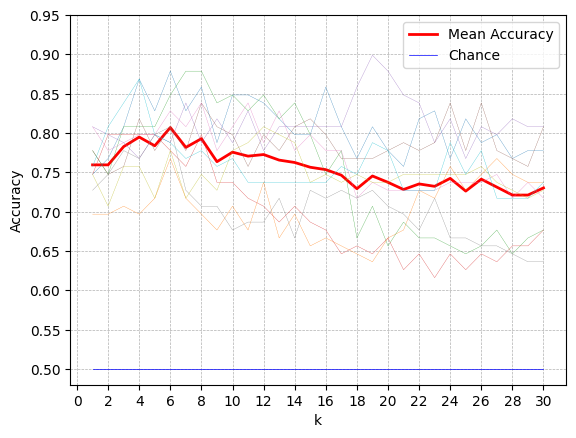

In [6]:
plt.plot(result[:, 0], result[:, 1]/10., 'r-', label='Mean Accuracy', linewidth=2)
plt.plot(result[:, 0], np.repeat(.5,30) , 'b-', label='Chance', linewidth=.5)
for idx in range(10):
  plt.plot(individualResults[idx, :, 0], individualResults[idx, :, 1], linewidth=.2)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(np.arange(0, 31, 2))
plt.yticks(np.arange(0.5, 1., 0.05))
plt.legend()
plt.show()


## Cross Validation

In [16]:
def validation_score(index) :
  # use the index as a validation set 
  # and the rest as a training set
  InputSize = datasetInput[index].shape[0]
  LabelSize = datasetLabel[index].shape[0]

  assert InputSize == LabelSize

  trainInput = np.array([datasetInput[i].iloc[:, :].values for i in range(1, 11) if i != index])
  trainLabel = np.array([datasetLabel[i].iloc[:, :].values for i in range(1, 11) if i != index])

  trainInput = trainInput.reshape((trainInput.shape[0] * trainInput.shape[1], trainInput.shape[2]))
  trainLabel = trainLabel.reshape((trainLabel.shape[0] * trainLabel.shape[1], trainLabel.shape[2]))

  testInput = datasetInput[index].iloc[:, :].values 
  testLabel = datasetLabel[index].iloc[:, :].values



  result = np.zeros((30, 2))
  for ksize in range(1, 31):
    correct = 0
    for testcase in range(testInput.shape[0]):
      if findNearestK(trainInput, trainLabel, ksize, testInput[testcase, :]) == testLabel[testcase, 0] - 5:
        correct += 1
    result[ksize - 1, 0] = ksize
    result[ksize - 1, 1] += correct / testInput.shape[0]

  return result

validationResults = np.zeros((10, 30, 2))
for index in range(1, 11):
  validationResults[index - 1, :, :] = validation_score(index)

print(validationResults)

99 99
99 99
99 99
99 99
99 99
99 99
99 99
99 99
99 99
99 99
[[[ 1.          0.71717172]
  [ 2.          0.73737374]
  [ 3.          0.78787879]
  [ 4.          0.81818182]
  [ 5.          0.7979798 ]
  [ 6.          0.81818182]
  [ 7.          0.7979798 ]
  [ 8.          0.77777778]
  [ 9.          0.78787879]
  [10.          0.7979798 ]
  [11.          0.81818182]
  [12.          0.80808081]
  [13.          0.81818182]
  [14.          0.83838384]
  [15.          0.82828283]
  [16.          0.83838384]
  [17.          0.80808081]
  [18.          0.83838384]
  [19.          0.83838384]
  [20.          0.82828283]
  [21.          0.78787879]
  [22.          0.80808081]
  [23.          0.80808081]
  [24.          0.83838384]
  [25.          0.81818182]
  [26.          0.82828283]
  [27.          0.82828283]
  [28.          0.84848485]
  [29.          0.80808081]
  [30.          0.81818182]]

 [[ 1.          0.71717172]
  [ 2.          0.73737374]
  [ 3.          0.78787879]
  [ 4.        

In [79]:

plt.plot(result[:, 0], result[:, 1]/10., 'r-', label='testset Accuracy', linewidth=2)
meanValidationResults = np.mean(validationResults, axis=0)
plt.plot(meanValidationResults[:, 0], meanValidationResults[:, 1], 'g-', label='validation Accuracy', linewidth=2)
maxk = np.argmax(meanValidationResults[:, 1])
plt.plot(meanValidationResults[maxk, 0], meanValidationResults[maxk, 1], 'bo', label='best k', linewidth=2)
for idx in range(10):
  plt.plot(validationResults[idx, :, 0], validationResults[idx, :, 1], linewidth=.2)
plt.plot(result[:, 0], np.repeat(.5,30) , 'b-', label='Chance', linewidth=.5)
            
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(np.arange(0, 31, 2))
plt.yticks(np.arange(0.5, 1., 0.05))
plt.legend()
print("best k = ", meanValidationResults[maxk, 0])
print("best validation accuracy = ", meanValidationResults[maxk, 1])

print("testset accuracy = ", result[maxk, 1]/10.)
# plt.figtext(0.5, 0.01, "best k = " + str(int(meanValidationResults[maxk, 0])) + "\nbest validation accuracy = " + str(meanValidationResults[maxk, 1])[:5] + "\ntestset accuracy = " + str(result[maxk, 1]/10.), ha="center", fontsize=10, bbox={"facecolor":"orange", "alpha":0.99, "pad":5}  )
plt.show()


    

best k =  19.0
best validation accuracy =  0.8121212121212122
testset accuracy =  0.7454545454545454


k =  1 mean accuracy =  0.7474747474747475
k =  2 mean accuracy =  0.7575757575757576
k =  3 mean accuracy =  0.7838383838383839
k =  4 mean accuracy =  0.7959595959595959
k =  5 mean accuracy =  0.7818181818181817
k =  6 mean accuracy =  0.788888888888889
k =  7 mean accuracy =  0.7919191919191919
k =  8 mean accuracy =  0.805050505050505
k =  9 mean accuracy =  0.7959595959595959
k =  10 mean accuracy =  0.7919191919191919
k =  11 mean accuracy =  0.788888888888889
k =  12 mean accuracy =  0.7878787878787878
k =  13 mean accuracy =  0.794949494949495
k =  14 mean accuracy =  0.8111111111111111
k =  15 mean accuracy =  0.807070707070707
k =  16 mean accuracy =  0.8101010101010102
k =  17 mean accuracy =  0.8111111111111111
k =  18 mean accuracy =  0.8121212121212121
k =  19 mean accuracy =  0.807070707070707
k =  20 mean accuracy =  0.8161616161616161
k =  21 mean accuracy =  0.805050505050505
k =  22 mean accuracy =  0.806060606060606
k =  23 mean accuracy =  0.809090909090909
k =  2

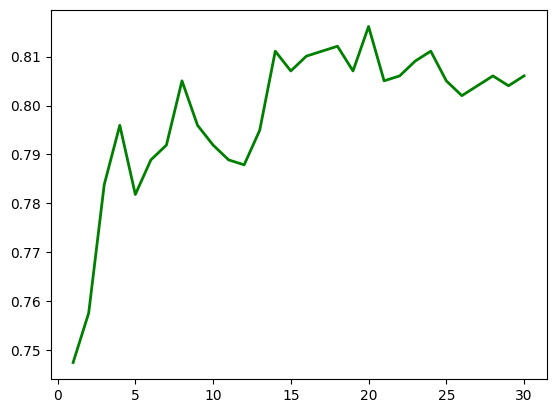

In [89]:
import sklearn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

trainInput = np.array([datasetInput[i].iloc[:, :].values for i in range(1, 11)])
trainLabel = np.array([datasetLabel[i].iloc[:, :].values for i in range(1, 11)])

trainInput = trainInput.reshape((trainInput.shape[0] * trainInput.shape[1], trainInput.shape[2]))
trainLabel = trainLabel.reshape((trainLabel.shape[0] * trainLabel.shape[1], trainLabel.shape[2]))


best_k = 0
max_score = 0
SKValidationResults = np.zeros((30, 2))
for k in range(1, 31):
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, trainInput, trainLabel.ravel(), cv=10, scoring='accuracy')
  print("k = ", k, "mean accuracy = ", scores.mean())
  SKValidationResults[k - 1, 0] = k
  SKValidationResults[k - 1, 1] = scores.mean()
  if scores.mean() > max_score:
    max_score = scores.mean()
    best_k = k
# print("best k = ", best_k, "best score = ", max_score)

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(trainInput, trainLabel.ravel())


print("testset accuracy = ", knn.score(testInput, testLabel.ravel()))

plt.plot(SKValidationResults[:, 0], SKValidationResults[:, 1], 'g-', label='validation Accuracy', linewidth=2) 
plt.show()
